# Project: A/B Testing Marketing Promotions

### Question to answer: Which promotion was most effective?

### Scenario:

A fast food chain plans to add a new item/product to its menu. They are undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item/product is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item/product are recorded in a dataset for a duration of 4 weeks.

### Description of Dataset:

The dataset has 548 entries consisting of promotional data for stores. The columns are:
* **MarketID**: an internal tag to describe market tags.
* **AgeOfStore**: Age of store in years. Range 1 to 28 years. Average store age is 8.5 years.
* **LocationID**: Unique identifier for store location. Each location is identified by a number. The total number of stores is 137.
* **Promotion**: One of three promotions that were tested (1,2,3). We don't really know the specifics of each promotion.
* **SalesInThousands**: Sales amount for a specific Location ID, Promotion, and Week. The mean amount of sales are 53.5 thousand dollars.
* **MarketSize**: there are three types of market sizes: small, medium, and large.
* **Week**: The week the promotions were run. Range: 1 - 4. E.g. 1 means promotion was run on the first week of the month.

## Section 1: Data Wrangling

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

In [4]:
pd.read_csv('/Users/deepshikasharma/Desktop/optimizing_ads_with_ab_testing/marketing_campaign_promotion_data.csv')

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [5]:
df = pd.read_csv('/Users/deepshikasharma/Desktop/optimizing_ads_with_ab_testing/marketing_campaign_promotion_data.csv')

In [6]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [9]:
print("Rows :", df.shape[0])
print("Columns :", df.shape[1])
print("\nFeatures :\n", df.columns.tolist())
print("\nMissing Values :", df.isnull().sum().values.sum())
print('\nUnique Values :\n', df.nunique())

Rows : 548
Columns : 7

Features :
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing Values : 0

Unique Values :
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


## Section 2: Exploratory Data Analysis

#### 1a: Question - Which promotion was the most successful/dominant?

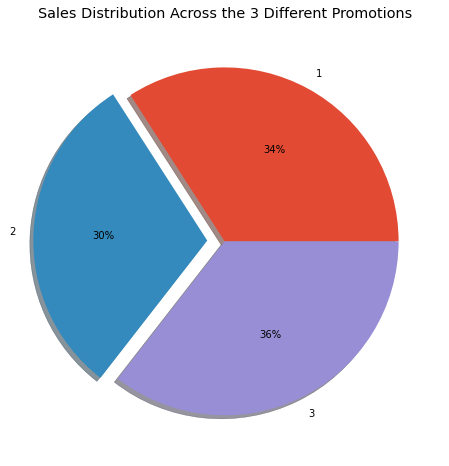

In [10]:
plt.style.use('ggplot')
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize = (8,8), autopct = '%1.0f%%', shadow = True, explode = (0, 0.1, 0))

ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

#### 1b: Answer - The *Sales Distribution Across the 3 Different Promotions* shows that Promotion 3 was the most dominant promotion in terms of Sales in Thousands.

#### 2a: Question - What are the promotions for each market size?

In [11]:
df.groupby(['Promotion', 'MarketSize']).count()['MarketID']

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

In [15]:
df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


Text(0.5, 1.0, 'Breakdowns of Market Sizes Across Different Promotions')

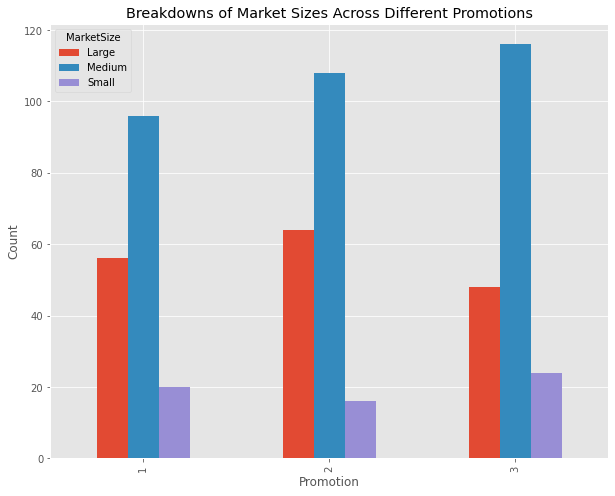

In [14]:
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(kind = 'bar', figsize = (10,8), grid = True)

ax.set_ylabel('Count')
ax.set_title('Breakdowns of Market Sizes Across Different Promotions')

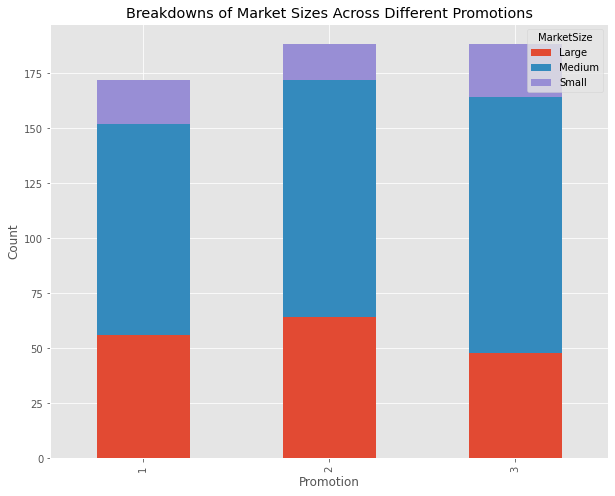

In [17]:
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(kind = 'bar', figsize = (10,8), grid = True, stacked = True)

ax.set_ylabel('Count')
ax.set_title('Breakdowns of Market Sizes Across Different Promotions')

plt.show()

#### 2b: Answer - The *Breakdown of Market Sizes Across Different Promotions* graphs show that Small market sizes were the least common for all three promotions and Medium market sizes were the most common for all three promotions.

#### 3a: Question - What are the most common store ages?

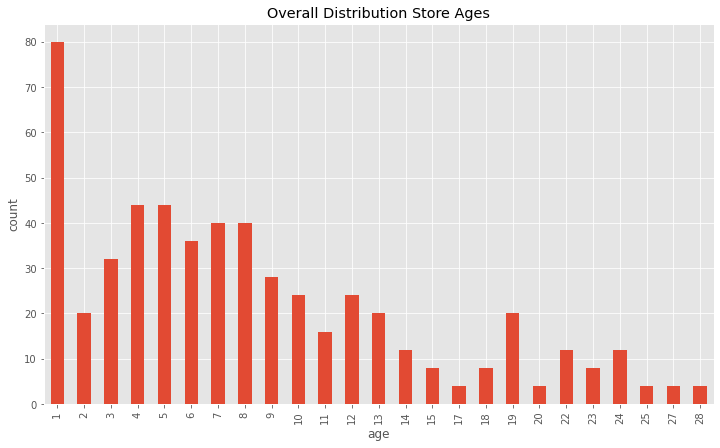

In [18]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(kind = 'bar', figsize = (12,7), grid = True)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distribution Store Ages')

plt.show()

#### 3b: Answer - The majority of the store ages are below 13 years.

#### 4a: Question - What is the breakdown of promotions used by each store age?

In [19]:
df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID']

AgeOfStore  Promotion
1           1            24
            2            36
            3            20
2           1             8
            2             8
            3             4
3           1            16
            2            12
            3             4
4           1            16
            2            12
            3            16
5           1             8
            2            12
            3            24
6           1            20
            2             4
            3            12
7           1             4
            2            24
            3            12
8           1            12
            2             8
            3            20
9           1             8
            2            12
            3             8
10          2            16
            3             8
11          1             4
            3            12
12          1            12
            2             4
            3             8
13          1            1

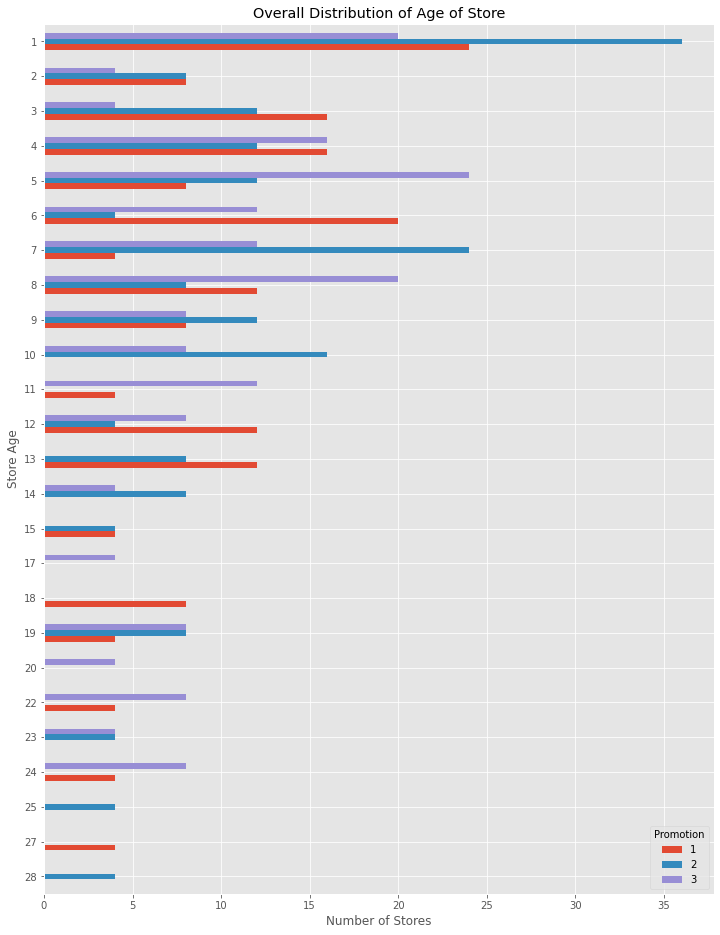

In [21]:
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(kind = 'barh', figsize = (12,16), grid = True)

ax.set_ylabel('Store Age')
ax.set_xlabel('Number of Stores')
ax.set_title('Overall Distribution of Age of Store')

plt.show()

#### 4a: Answer - Most of the younger age stores used Promotion 2.

In [22]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


### Section Conclusions:

The above table makes it easy to understand the overall store age distribution from our summary stats.

All test groups have similar age profiles and the average store age is ~8 to 9 years for these three groups.

The majority of the stores are 10-12 years old or even younger.

We can see that the store profiles are similar to each other.

This indicates that our sample groups are well controlled and the A/B testing results will be meaningful and trustworthy.

## Section 3: Performing A/B Testing

#### Statistics Information:

##### T-Value

The *t-value* measures the degree of difference relative to the variation in our data groups. Large *t-values* indicate a higher degree of difference between the groups.

##### P-value

The *P-value* measures the probability that the results would occur by random chance. Therefore the smaller the p-value is, the more statistically difference there will be between the two groups. A smaller p-value is ideal because it means it is unlikely the results occured by random chance. If the p-value is less than 0.05 then we reject the Null Hypothesis.

In [24]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']
print(means)
print(stds)
print(ns)

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64
Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


### Comparing Promotion 1 vs Promotion 2 in A/B Test

##### Null Hypothesis: There is no significant statistical difference between Promotion 1 & Promotion 2.

##### Alternate Hypothesis: There is a significant statistical difference between Promotion 1 & Promotion 2.

In [26]:
from scipy import stats

In [27]:
t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                      df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
                      equal_var = False)

print("t-value = " + str(t))
print("p-value = " + str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


#### Analysis of *p-value* & *t-value* from comparing Promotion 1 vs. Promotion 2.

The *p-value* is very close to 0, less than 0.05, which indicates that there is highly significant statistical evidence to **REJECT** the Null Hypothesis. There is a statistical difference between the two groups.

The *t-value* shows that the marketing performances for these two groups are significantly different and that **promotion 1 outperforms promotion 2**.

### Comparing Promotion 1 vs Promotion 3 in A/B Test

##### Null Hypothesis: There is no significant statistical difference between Promotion 1 & Promotion 3.

##### Alternate Hypothesis: There is a significant statistical difference between Promotion 1 & Promotion 3.

In [28]:
t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                      df.loc[df['Promotion'] == 3, 'SalesInThousands'].values,
                      equal_var = False)

print("t-value = " + str(t))
print("p-value = " + str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


#### Analysis of *p-value* & *t-value* from comparing Promotion 1 vs. Promotion 3.

The average sales from promotion group 1 (58.1) is higher than those from promotion group 2 (55.36).

The *t-value* 1.55 is a lot lower than the *t-value* in the previous test which means that the data between Promotion 1 and Promotion 3 is more similar than the data between Promotion 1 and Promotion 2.

The *p-value* is higher than 0.05. No conclusion can be made to reject the Null Hypothesis. The results support the Null Hypothesis, therefore we fail to reject the Null Hypothesis meaning the test has not identified a consequential relationship between Promotion 1 and Promotion 3.

The differences in means of Promotion 1 mean of 58.099 and Promotion 2 mean of 55.36 is purely due to random chance. This could be due to not having enough samples in our data.